In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
tc = pd.read_csv('C:\Data Science\Regression\MLR\\ToyotaCorolla.csv', encoding = 'unicode_escape')
tc

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
tc1 = tc[['Price', 'Age_08_04' , 'KM' , 'HP' ,'cc' , 'Doors' , 'Gears' ,'Quarterly_Tax' , 'Weight']]
tc1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [4]:
tc1.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [5]:
tc1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


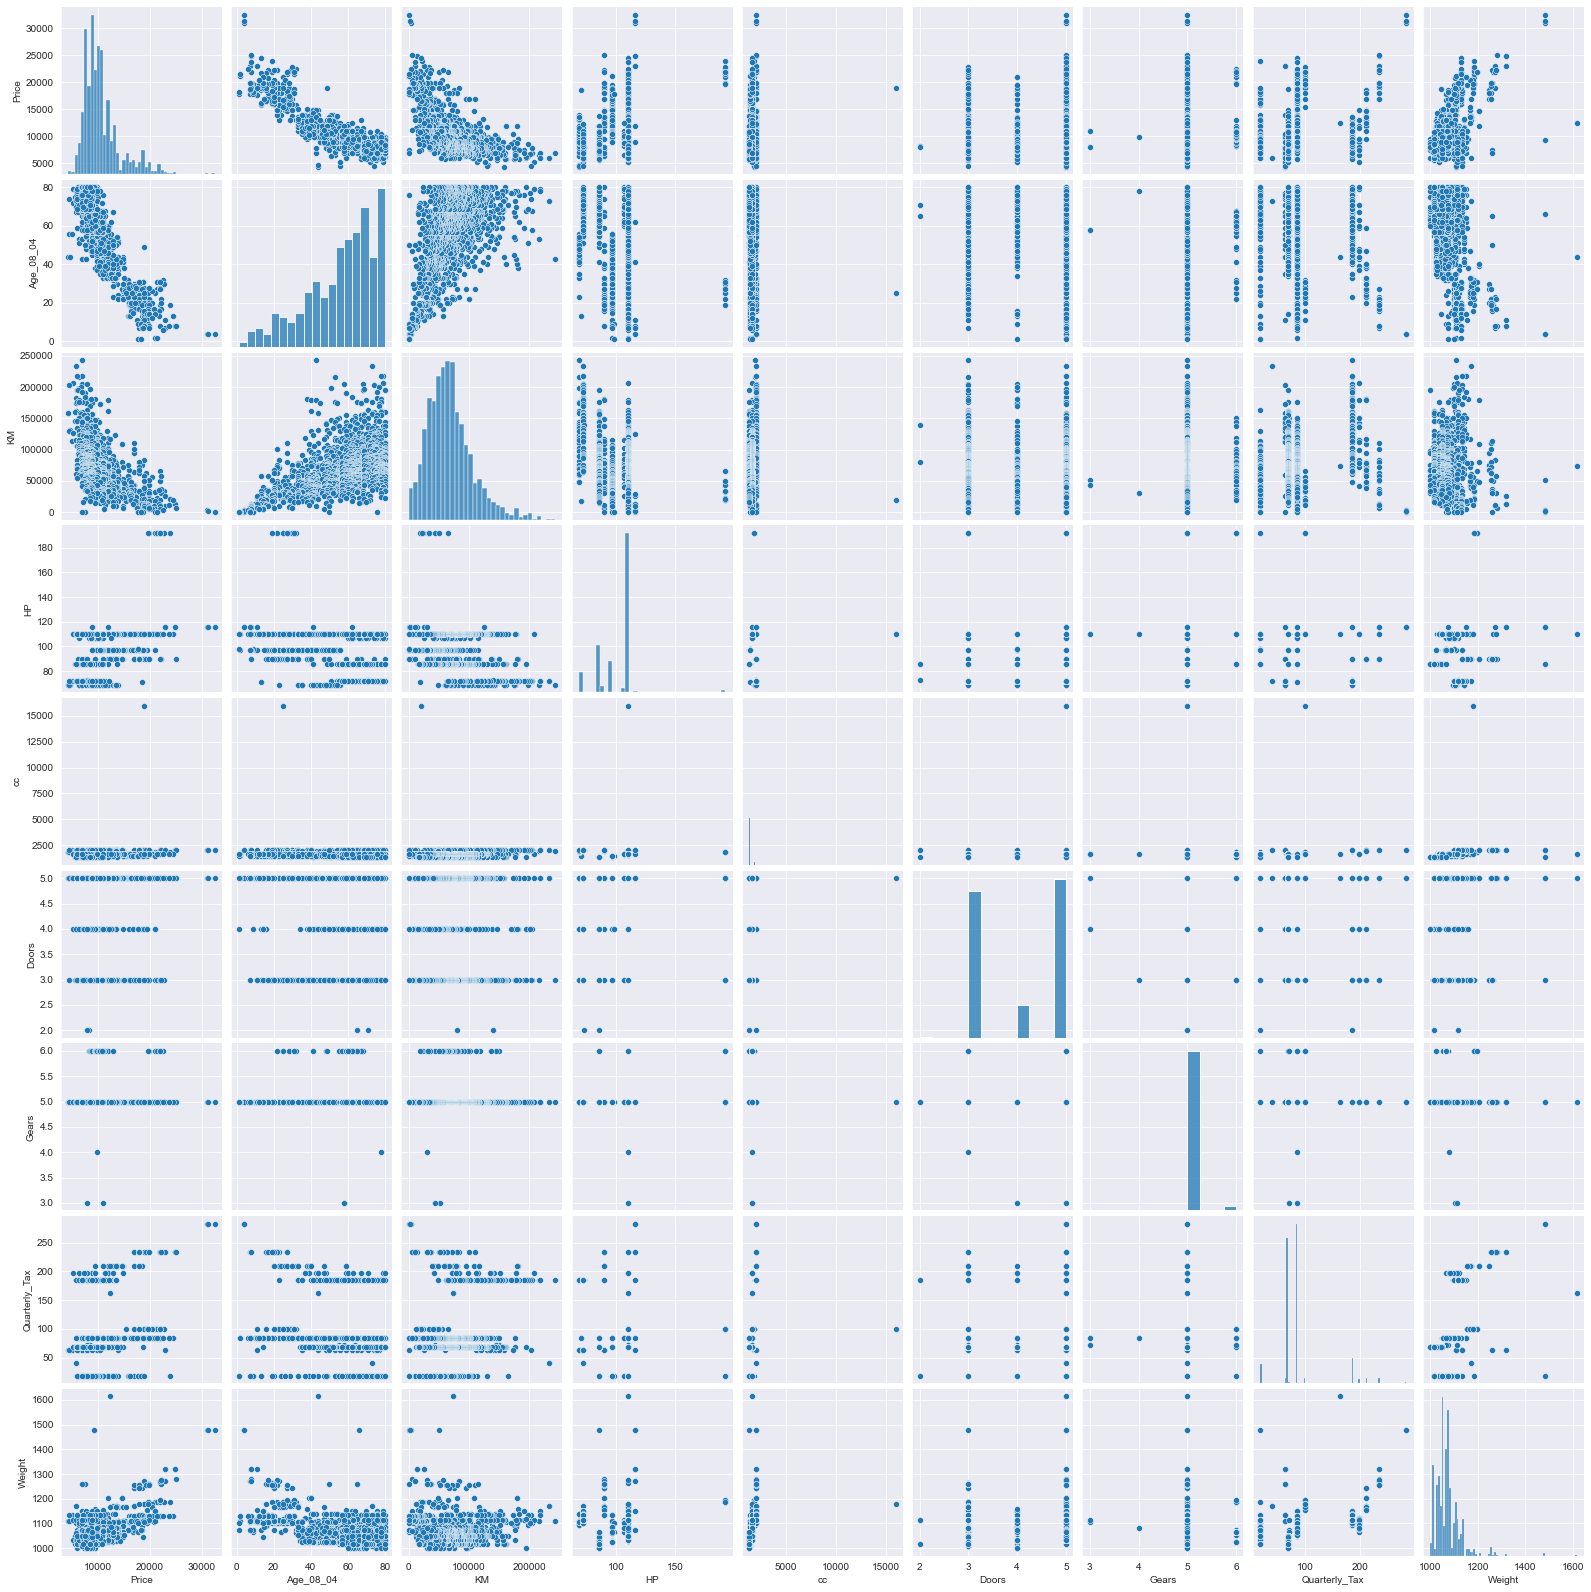

In [6]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(tc1)

Preparing Model

In [7]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=tc1).fit()

In [8]:
#Coefficients
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [9]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [10]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

In [13]:
ml_v=smf.ols('Price~Doors',data = tc1).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [14]:
ml_w=smf.ols('Price~cc',data = tc1).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues) 

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [15]:
ml_wv=smf.ols('Price~Doors+cc',data = tc1).fit()  
print(ml_wv.tvalues, '\n', ml_wv.pvalues)  

Intercept    12.620704
Doors         6.816153
cc            4.340400
dtype: float64 
 Intercept    1.056885e-34
Doors        1.373469e-11
cc           1.521992e-05
dtype: float64


In [22]:
rsq_age_08_04 = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=tc1).fit().rsquared  
vif_age_08_04 = 1/(1-rsq_hp) # 16.33

rsq_km = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=tc1).fit().rsquared  
vif_km = 1/(1-rsq_wt) # 564.98

rsq_hp = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=tc1).fit().rsquared  
vif_hp = 1/(1-rsq_vol) #  564.84

rsq_cc = smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=tc1).fit().rsquared  
vif_cc = 1/(1-rsq_sp) #  16.35

rsq_doors = smf.ols('Doors~cc+Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight',data=tc1).fit().rsquared  
vif_doors = 1/(1-rsq_sp) #  16.35

rsq_gears = smf.ols('Gears~cc+Age_08_04+KM+HP+Doors+Quarterly_Tax+Weight',data=tc1).fit().rsquared  
vif_gears = 1/(1-rsq_sp) #  16.35

rsq_quarterly_tax = smf.ols('Quarterly_Tax~cc+Age_08_04+KM+HP+Doors+Gears+Weight',data=tc1).fit().rsquared  
vif_quarterly_tax = 1/(1-rsq_sp) #  16.35

rsq_weight = smf.ols('Weight~cc+Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax',data=tc1).fit().rsquared  
vif_weight = 1/(1-rsq_sp) #  16.35

# Storing vif values in a data frame
d1 = {'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_age_08_04,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_quarterly_tax,vif_weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,2.516420
4,Doors,2.516420
5,Gears,2.516420
6,Quarterly_Tax,2.516420
7,Weight,2.516420


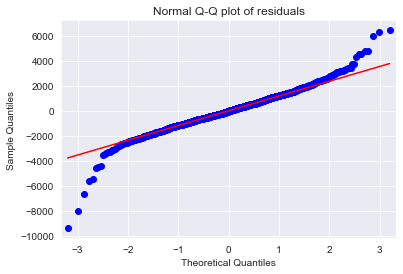

In [23]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [25]:
list(np.where(model.resid>6000))

[array([147, 523], dtype=int64)]

In [26]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

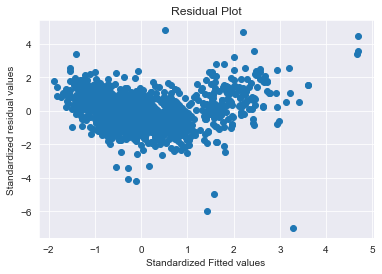

In [27]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

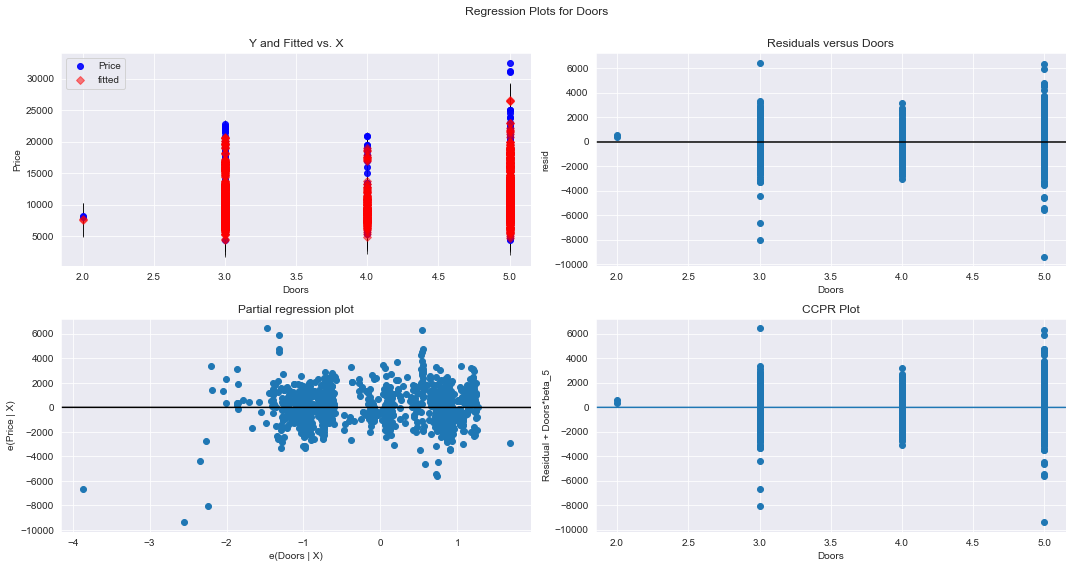

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

In [31]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_V= smf.ols('Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight',data = tc1).fit()
 

In [32]:
(final_ml_V.rsquared,final_ml_V.aic) 

(0.8635902024630112, 24766.894177022983)

# Startup data set

In [38]:
start = pd.read_csv('C:\Data Science\Regression\MLR\\50_startups.csv')
start.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [83]:
start1 = start.drop(['State'],axis =1)
start1.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [45]:
start1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [46]:
#checking for missing values
start1.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

# correlation matrix

In [84]:
start1.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot between variables along with histograms

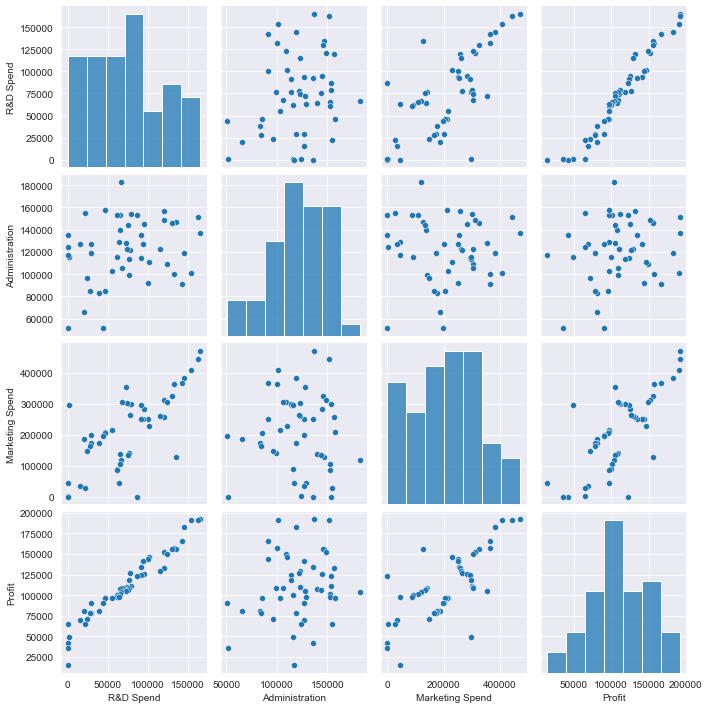

In [49]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(start1)

# preparing a model

In [85]:
start2 = start1.rename({'R&D Spend' : 'Rspend', 'Marketing Spend' : 'Marketing'},axis=1)
start2.head()

,Rspend,Administration,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [74]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~Rspend+Administration+Marketing',data=start2).fit()

In [75]:
#Coefficients
model.params

Intercept         50122.192990
Rspend                0.805715
Administration       -0.026816
Marketing             0.027228
dtype: float64

In [76]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept          7.626218
Rspend            17.846374
Administration    -0.525507
Marketing          1.655077
dtype: float64 
 Intercept         1.057379e-09
Rspend            2.634968e-22
Administration    6.017551e-01
Marketing         1.047168e-01
dtype: float64


In [77]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

# Simple Linear Regression Models

In [78]:
ml_a=smf.ols('Profit~Administration',data = start2).fit()  
#t and p-Values
print(ml_a.tvalues, '\n', ml_a.pvalues)  

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [79]:
ml_m=smf.ols('Profit~Marketing',data = start2).fit()  
print(ml_m.tvalues, '\n', ml_m.pvalues)  

Intercept    7.808356
Marketing    7.802657
dtype: float64 
 Intercept    4.294735e-10
Marketing    4.381073e-10
dtype: float64


In [81]:
ml_am=smf.ols('Profit~Administration+Marketing',data = start2).fit()  
print(ml_am.tvalues, '\n', ml_am.pvalues)  

Intercept         1.142741
Administration    2.467779
Marketing         8.281039
dtype: float64 
 Intercept         2.589341e-01
Administration    1.729198e-02
Marketing         9.727245e-11
dtype: float64


# Calculating VIF

In [88]:
 

rsq_s = smf.ols('Rspend~Administration+Marketing',data=start2).fit().rsquared  
vif_s = 1/(1-rsq_wt) # 564.98

rsq_a = smf.ols('Administration~Rspend+Marketing',data=start2).fit().rsquared  
vif_a = 1/(1-rsq_vol) #  564.84

rsq_m = smf.ols('Marketing~Rspend+Administration',data=start2).fit().rsquared  
vif_m = 1/(1-rsq_sp) #  16.35

# Storing vif values in a data frame
d1 = {'Variables':['Rspend','Administration','Marketing'],'VIF':[vif_s,vif_a,vif_m]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Rspend,1.756905
1,Administration,1.419422
2,Marketing,2.516420


## Test for Normality of Residuals (Q-Q Plot)

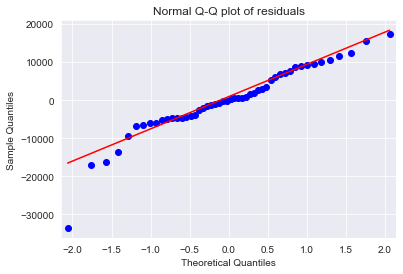

In [87]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [89]:
list(np.where(model.resid<-10000))

[array([14, 15, 48, 49], dtype=int64)]

## Residual Plot for Homoscedasticity

In [90]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

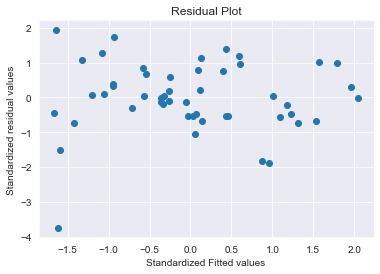

In [91]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

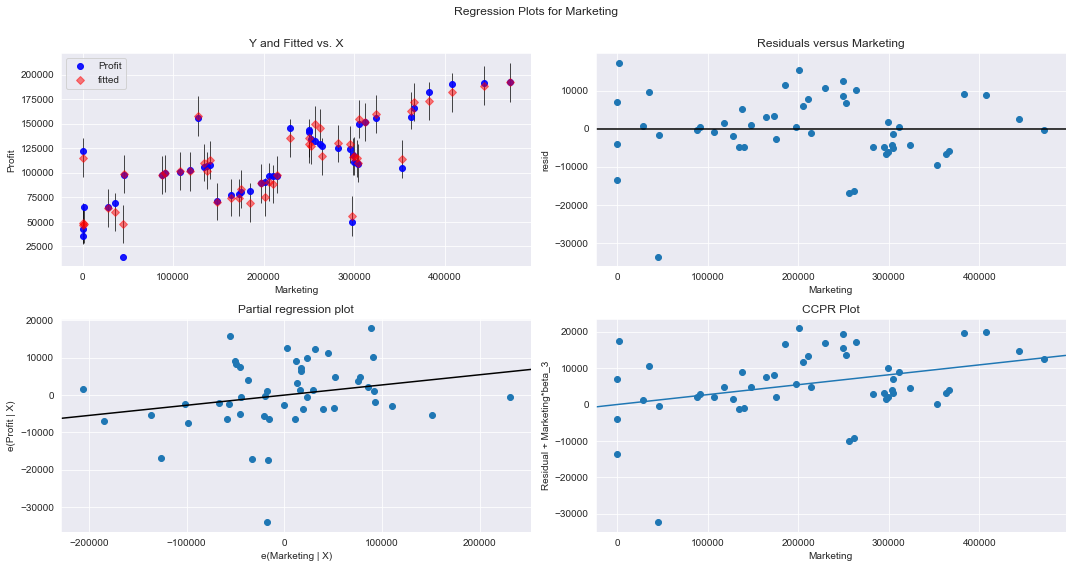

In [92]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing", fig=fig)
plt.show()

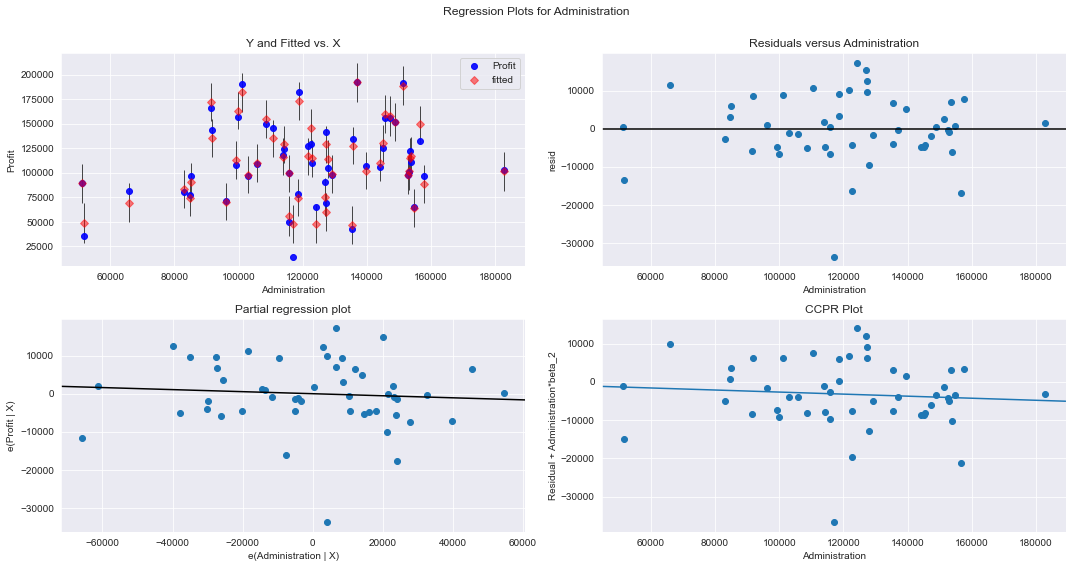

In [93]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

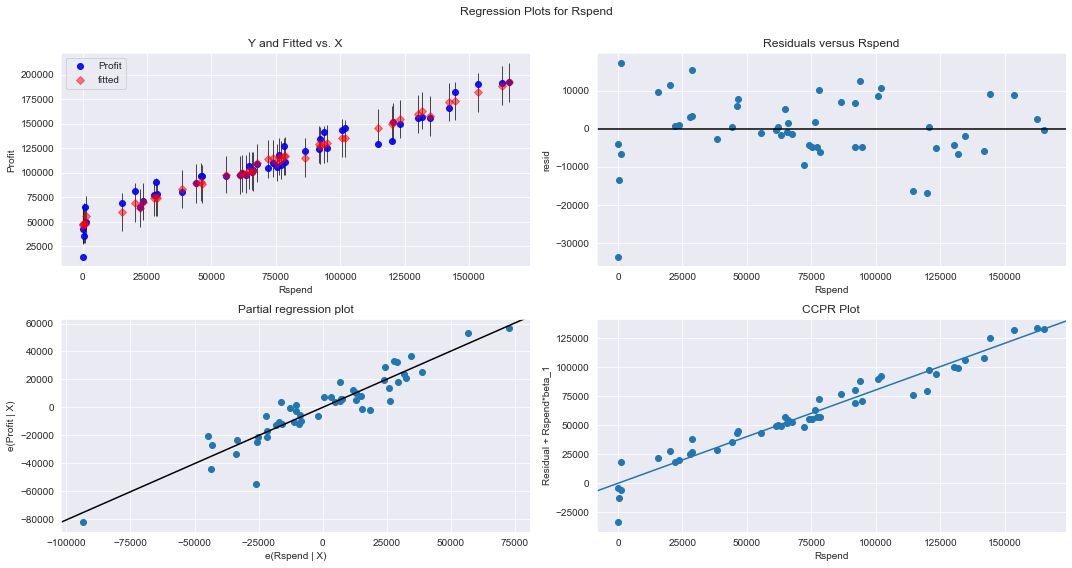

In [94]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Rspend", fig=fig)
plt.show()

## Detecting Influencers/Outliers

## Cook’s Distance

In [95]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

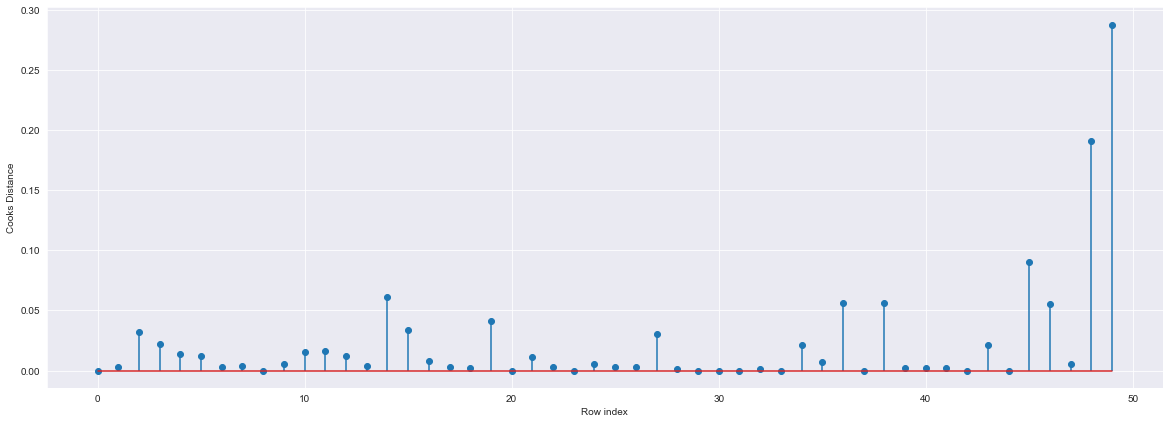

In [96]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(start2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [97]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

## High Influence points

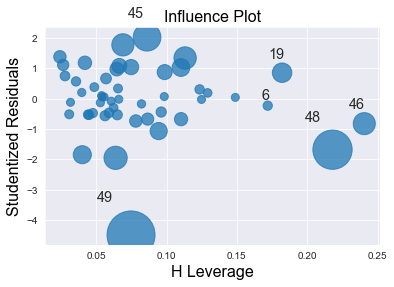

In [98]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [99]:
k = start2.shape[1]
n = start2.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [100]:
start2[start2.index.isin([49,48,46,45])]

,Rspend,Administration,Marketing,Profit
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


In [101]:
start2.head()

,Rspend,Administration,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Improving the model

In [130]:
#Load the data
start_new = pd.read_csv("C:\\Data Science\\Regression\\MLR\\50_startups.csv")

In [131]:
#Discard the data points which are influencers and reasign the row number (reset_index())
start3=start_new.drop(start_new.index[[49,48,46,45]],axis=0).reset_index()
start3.head()

,index,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
#Drop the original index
car1=car1.drop(['index'],axis=1)

In [134]:
start4 = start3.rename({'R&D Spend':'Rspend'}, axis = 1)
start4.head()

,index,Rspend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


In [135]:
#Exclude variable "marketing" and generate R-Squared and AIC values
final_ml_V= smf.ols('Profit~RSpend+Administration',data = start4).fit()

PatsyError: Error evaluating factor: NameError: name 'RSpend' is not defined
    Profit~RSpend+Administration
           ^^^^^^